<a href="https://colab.research.google.com/github/sota1111/ML_basic/blob/main/ML_basic_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!git config --global user.email "sota.moro@gmail.com"
!git config --global user.name "sota1111"

Mounted at /content/drive


# 2.3 教師あり機械学習アルゴリズム

In [2]:
!pip install numpy matplotlib ipython scikit-learn pandas pillow mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 11.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=6ee4d96100329bbe8cace02bb9072040ab3df5cc6875e487be060e3fb5b78d1a
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

## 2.3.1 サンプルデータセット

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


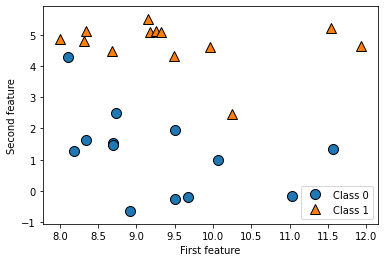

In [4]:
# データセットの生成
X, y = mglearn.datasets.make_forge()
# データセットをプロット
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0, 0.5, 'Target')

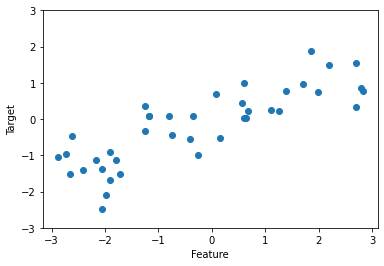

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [8]:
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [9]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
np.bincount(cancer.target)

array([212, 357])

In [11]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [13]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## 2.3.2 k-最近傍法

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


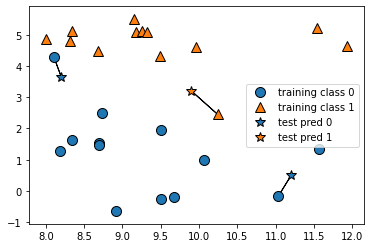

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


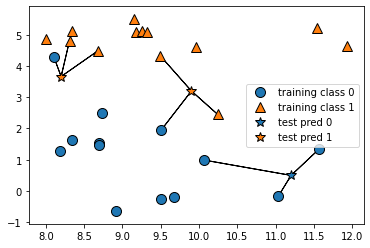

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [16]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [18]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [20]:
print("Test set accuracy: {}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.8571428571428571


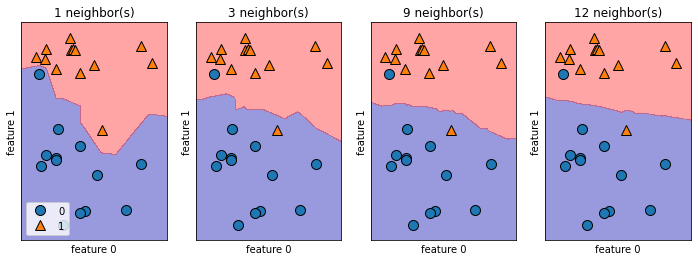

In [21]:
fig, axes = plt.subplots(1, 4, figsize=(12,4))
for n_neighbors, ax in zip([1,3,9,12], axes):
  # fitメソッドは自分自身を返すので1行でインスタンスを生成してfitすることができる。
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

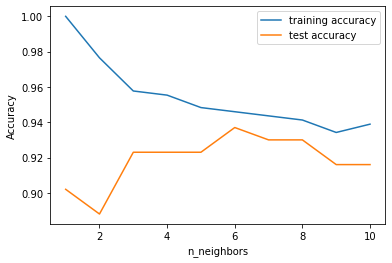

In [22]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# n_neighborsを1から10まで試す
# range(start, stop)のように引数に整数を2つ指定すると、start ≦ i < stopの連番が生成される。
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
  # モデルを構築
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # 訓練セット精度を記録
  training_accuracy.append(clf.score(X_train, y_train))
  # 汎化精度を記録
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

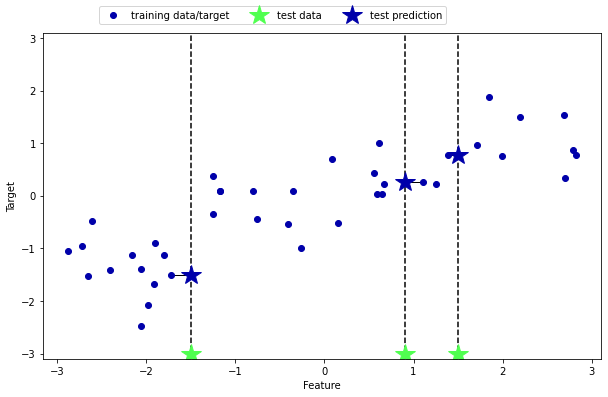

In [23]:
# k-近傍回帰 最近傍点をそもまま使う
mglearn.plots.plot_knn_regression(n_neighbors=1)

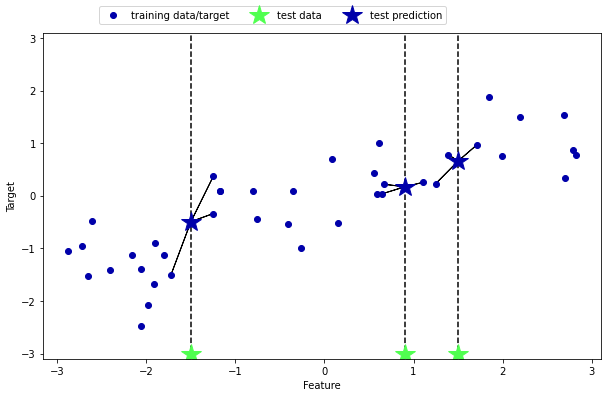

In [24]:
# 平均値を用いる
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [25]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# waveデータセットを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 3つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
# 訓練データと訓練ターゲットを用いてモデルを学習させる
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [26]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [27]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


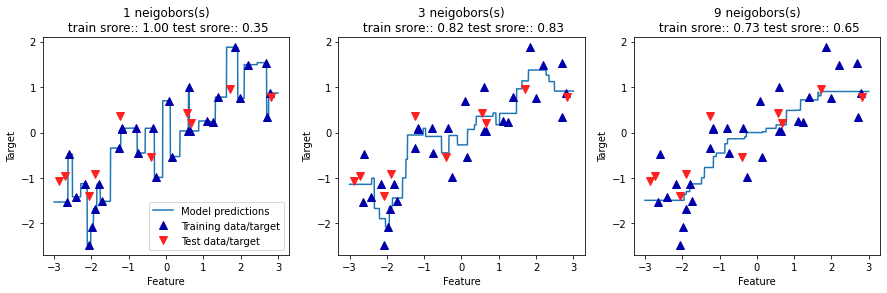

In [28]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
# -3から3までの間に1,000点のデータポイントを作る
line = np.linspace(-3, 3, 1000).reshape(-1, 1) # reshape(-1, 1)の意味が分からん
for n_neighbors, ax in zip([1, 3, 9], axes):
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

  ax.set_title("{} neigobors(s)\n train srore:: {:.2f} test srore:: {:.2f}"
  .format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
  ax.set_xlabel("Feature")
  ax.set_ylabel("Target")
  #ax.legend(["Model predictions", "Training data/target", "Test data/target"], loc='best')
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc='best')

In [29]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fbea35490>,
      dtype=object)

## 2.3.3 線形モデル

多数の特徴量を持つデータに対しては、線形モデルは非常に強力

w[0]: 0.393906  b: -0.031804


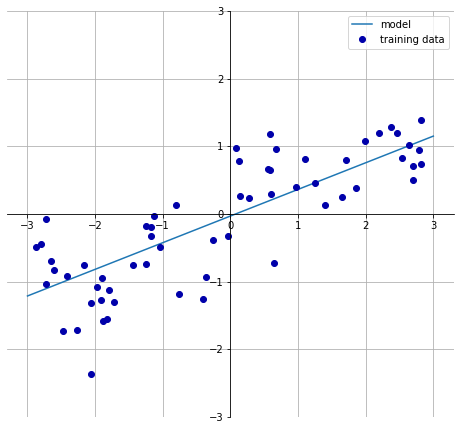

In [30]:
mglearn.plots.plot_linear_regression_wave()

### 2.3.3.2 線形回帰（通常最小二乗法）

In [31]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [32]:
print("lr.coef_:{}".format(lr.coef_))
print("le.intercept_:{}".format(lr.intercept_))
# sklearnでは訓練データから得られた属性にはすべて最後にアンダースコアを付ける慣習

lr.coef_:[0.39390555]
le.intercept_:-0.031804343026759746


In [33]:
print("Training set score:{:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score:0.67
Test set score: 0.66


訓練セットとテストセットの値が非常に近い。

これは、おそらく適合不足であって、過剰適合ではないことを意味する。

In [34]:
X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [35]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


↑過剰適合

### 2.3.3.1 リッジ回帰

個々の特徴量が出力与える影響をなるべく小さくしたい。（つまり傾きを小さくしたい）。この制約条件は、正則化（reularization）の位置利絵である。正則化とは、過剰適合を防ぐために明示的にモデルを制約することである。リッジ回帰で用いられている正則化は、L2正則化と呼ばれる。

In [36]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [37]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [38]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


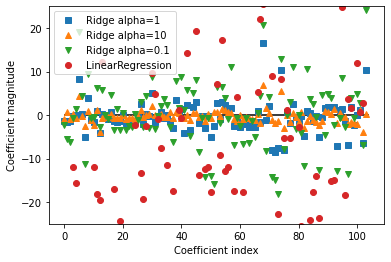

In [39]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

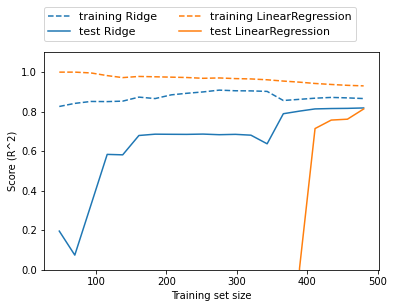

In [40]:
mglearn.plots.plot_ridge_n_samples()

データ量が多くなると、
* リッジ回帰と線形回帰は同じ性能を示す
* 線形回帰では訓練性能が低下する

### 2.3.3.4 Lasso

リッジ回帰と同様に、Lassoも係数が0になるように制約を掛けるが、掛け方が異なり、L1正則化と呼ばれる。
L1正則化の結果、Lassoにおいては、いくつかの係数が完全に0になる。これはモデルにおいていくつかの特徴量を完全に無視する。係数が0になると、モデルを解釈しやすくなり、どの特徴量が重要なのか明らかになる。

In [41]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of feature used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of feature used: 4


In [42]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of feature used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of feature used: 33


In [43]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of feature used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of feature used: 96


Text(0, 0.5, 'Coefficient magnitude')

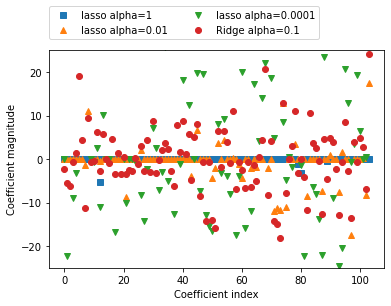

In [44]:
plt.plot(lasso.coef_, 's', label="lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

実用的にはリッジ回帰をまず試す。

特徴量がたくさんあり、重要なものがわずかしかないことが予測されるならLassoが向いている。
LassoとRidgeを組み合わせたElasticNetはL1正則化とL2正則化のパラメータの二つを調整する必要がある。

### 2.3.3.5 クラス分類のための線形モデル



線形モデルに依るクラス分類では、決定境界が入力の線形関数になる。

言い換えると線形の2クラス分類器は、2つのクラスを直線や平面や超平面で分割する。

線形モデルを学習するには様々なアルゴリズムがある。
* 係数と切片の特定の組み合わせと訓練データの適合度を測る尺度
* 正規化を行うか。行うならどの方法を使うか

最も一般的なクラス分類アルゴリズム
* 線形サポートベクタマシン
* ロジスティック回帰

ロジスティック回帰は回帰アルゴリズムではなく、クラス分類アルゴリズムである。

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


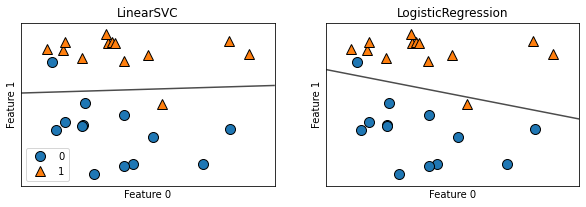

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC # SVC:Support Vector Classifier

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
  mglearn.discrete_scatter(X[:,0], X[:, 1], y, ax=ax)
  ax.set_title("{}".format(clf.__class__.__name__))
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")
axes[0].legend()

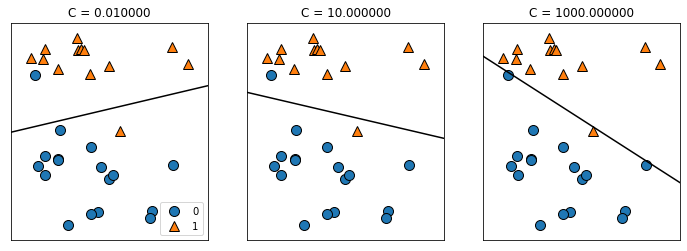

In [46]:
mglearn.plots.plot_linear_svc_regularization()

Cを0に近づけると、係数ベクトルwを0に近づけることを重視するようになる。

小さいCを用いると、データポイントの「大多数」に対して適合しようとする。

In [47]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)# stratify 各ラベルの比率を元のデータの比率と等しくする
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.951


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


訓練セットとテストセットの精度が近いので、適合不足の可能性が高い。

In [48]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.965


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [49]:
logreg001 = LogisticRegression(C=0.001).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.951


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


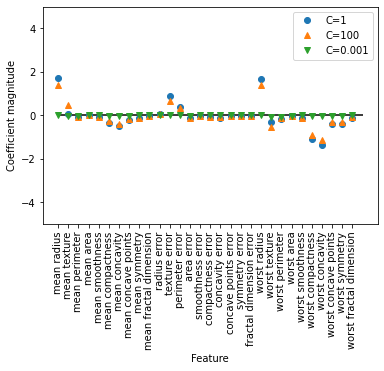

In [50]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


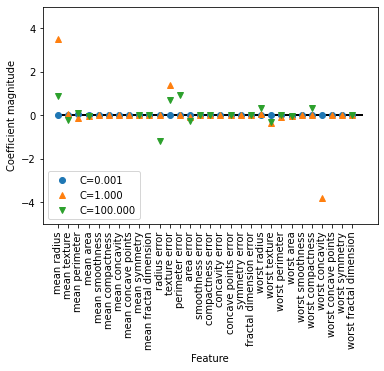

In [51]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
  lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
  print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
      C, lr_l1.score(X_train, y_train)))
  # scikit-learnを用いて、ロジスティック回帰を使う時、さらにL1正則化をかけたい時は**solver='liblinear'**を引数に追加
  print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
      C, lr_l1.score(X_test, y_test)))
  plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

  plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
  plt.hlines(0, 0, cancer.data.shape[1])
  plt.xlabel("Feature")
  plt.ylabel("Coefficient magnitude")

  plt.ylim(-5, 5)
  plt.legend(loc=3)

### 2.3.3.6 線形モデルによる多クラス分類

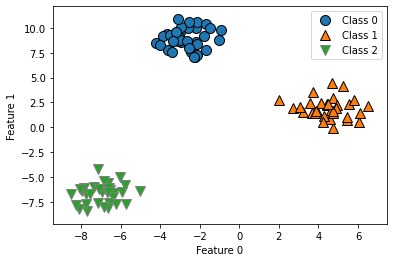

In [52]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) #x軸,y軸とlabelをプロット
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [53]:
linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


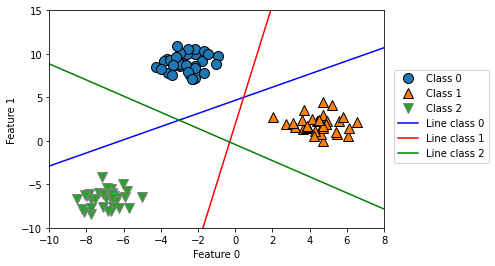

In [54]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
  plt.plot(line,-(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.03, 0.3))


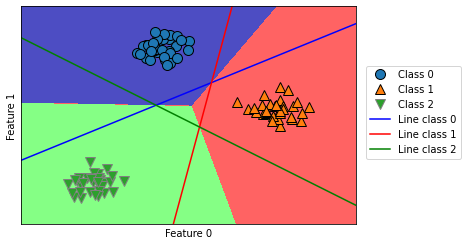

In [55]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
  plt.plot(line,-(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.03, 0.3))


### 2.3.3.7 利点、欠点、パラメータ

線形モデルの主要なパラメータ
* 回帰モデル：alpha
* LinearSVC, LogisticRegression：C

→alphaが大きい、Cが小さいと単純なモデルに対応

正則化
* L1正則化：一部の特徴量だけが重要
* L2正則化：デフォルト

線形モデルの利点
* 高速
* 大きなデータセットに活用可能
* 疎なデータにも機能
* 予測方法が比較的理解しやすい

10万、100万点のデータセットに対して
* LogisticRegressionとRidgeにsolver='sag'を使う
* SDGClassifierクラスとSGDRegressorクラスを使う


線形モデルは、特徴量の数がサンプルの個数よりも多い時に性能を発揮する。

## 2.3.4 ナイーブベイズクラス分類器

特徴
* 高速
* 汎化性能がLinearSVC, LogisticRegressionより劣る

scikit-learnに含まれるナイーブベイズクラス分類器
* GaussianNB：任意の連続データ
* BernoulliNB：二値データ
* MultinomialNB：カウンタデータ

In [56]:
X = np.array([[0,1,0,1],
              [1,0,1,1],
              [0,0,0,1],
              [1,0,1,0]])
y = np.array([0,1,0,1])

In [57]:
counts = {}
for label in np.unique(y):
  # クラスに対してループ
  # それぞれの特徴量ごとに非ゼロの数を（加算で）数える
  counts[label] = X[y==label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [58]:
np.unique(y)

array([0, 1])

In [59]:
X[y==0]

array([[0, 1, 0, 1],
       [0, 0, 0, 1]])

### 2.3.4.1 利点、欠点、パラメータ

BernoulliNB、MultinomialNBはパラメータが一つ


モデルの複雑さを制御するalpha：大きくなるとスムーズになり、複雑さは減少する。alphaの値が性能に大きな違いをもたらすことはない。


## 2.3.5 決定木

決定木：クラス分類や回帰タスクに広く用いられるモデル。

Yes/Noで答えられる質問で構成された階層的な木構造を学習する。

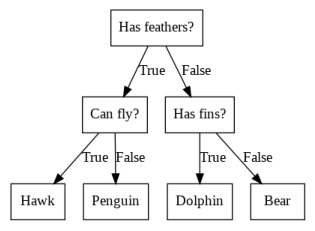

In [60]:
mglearn.plots.plot_animal_tree()

### 2.3.5.1 決定木の構築

データの再帰分割は、対象の領域に一つの対象値しか含まれなくなるまで繰り返される。

一つの対象値しか含まれないような決定木の葉を純粋と呼ぶ。

### 2.3.5.2 決定木の複雑さの制御

葉が純粋になるまで分割を続けると、モデルは複雑になりすぎ、訓練データに大幅に過剰適合する。

過剰適合を防ぐ方法
* 事前枝刈り：構築過程で木の生成を止める
* 事後枝刈り：構築後、情報の少ないノードを削除

scikit-learnに含まれる決定木
* DecisionTreeRegressor
* DecisionTreeClassifier

scikit-learnには事前枝刈りしか実装されていない。

In [61]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [62]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


### 2.3.4.3 決定木の解析

In [63]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], 
                feature_names=cancer.feature_names, impurity=False,filled=True)

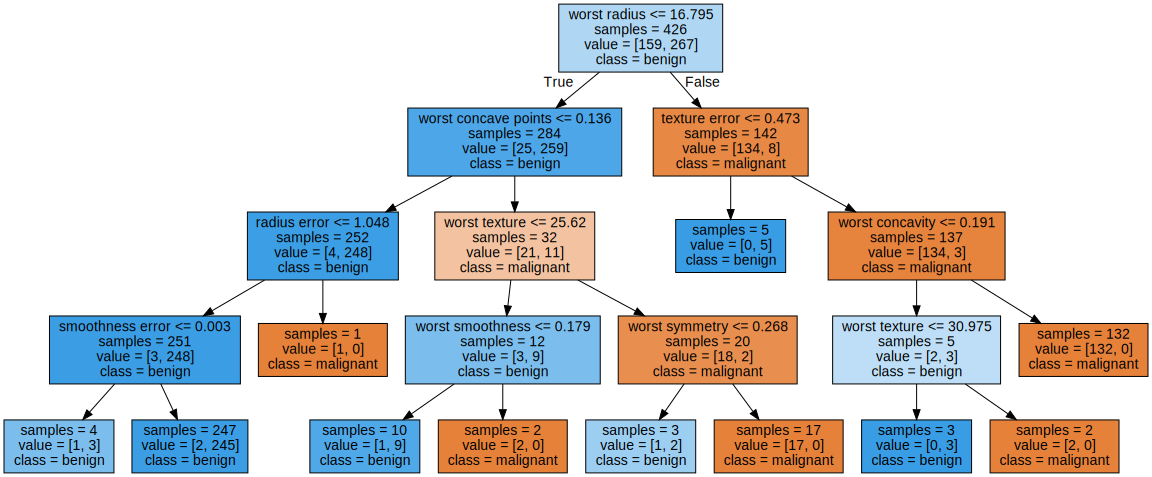

In [64]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

アルゴリズムの予測過程を知ることができる

### 2.3.5.4 決定木の特徴量の重要性

In [65]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


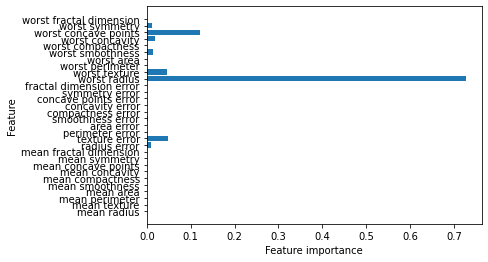

In [66]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

worst radiusが重要。

他の特徴が重要でない訳ではない。

Feature importances: [0. 1.]


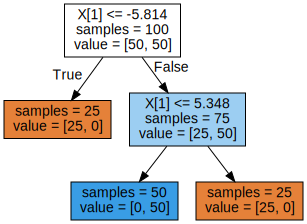

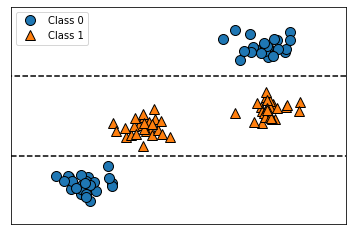

In [67]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

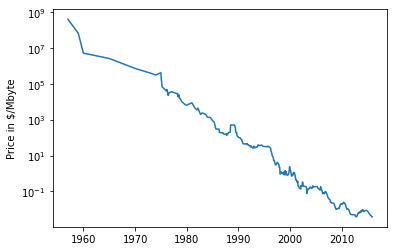

In [68]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.ylabel("Price in $/Mbyte")

In [69]:
from sklearn.tree import DecisionTreeRegressor
# 過去のデータを用いて2000年以降の価格を予想する
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 日付に基づいて価格を予測
X_train = data_train.date[:,np.newaxis]
# データとターゲットの関係を単純にするために対数変換
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 全ての価格を予想
X_all = ram_prices.date[:,np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 対数変換をキャンセルするために逆変換
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  from ipykernel import kernelapp as app


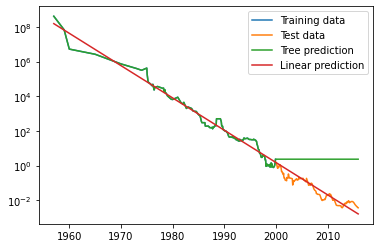

In [70]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

### 2.3.5.5 長所、短所、パラメータ

事前刈り取りパラメータ（どれか一つで良い）
* max_depth
* max_leaf_nodes
* min_sample_leafs

利点
* 可視化により専門家以外にも理解可能
* データのスケールに対して完全に不変→特徴量の正規化や標準化は不要

問題点
* 過剰適合しやすく、汎化性能が低い傾向がある→決定木を単独で用いず、アンサンブル法を用いる

## 2.3.6 決定木のアンサンブル法

### 2.3.6.1 ランダムフォレスト

決定木は過剰適合しやすい。

過剰適合した決定木の平均を取ることで、過剰適合の度合いを減らす。

個々の決定木は比較的うまく予測できているが、一部のデータに過剰適合してしまっているという考え方に基づく。
異なった方向に過剰適合した決定木の平均を取ることで過剰適合の度合いを減らす。


ランダムフォレストは個々の決定木が互いに異なるように、決定木の構築過程で乱数を導入していることから付いている。乱数の導入方法は以下の二つ。
* 決定木を作るためのデータポイントを選択する方法
* 分枝テストに用いる特徴を選択する方法

**ランダムフォレストの構築**

**ブートストラップサンプリング**：
n_samples個のデータポイントから交換ありで、データポイントをランダムにn_samples回選び出す手法

個々のノードで最適なテストを選ぶのではなく、特徴量のサブセットをランダムに選び、その特徴量を使うものの中から最適なテストを選ぶ。特徴量サブセットの大きさはmax_featuresで制御できる。

ブートストラップサンプリングにより、ランダムフォレストの中の個々の決定木が少しづつ違うデータセットに対して構築されることになる。

max_featuresをn_samplesに設定すると、それぞれの分岐でデータセット中の全ての特徴量を見ることになり、特徴量選択時の乱数性はなくなる。（ブートストラップサンプリングによる乱数性は残る）

結果の出力
回帰：全ての決定木の平均値
クラス分類：「ソフト投票」を行い、個々の出力ラベルに対して確率を出力する。

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

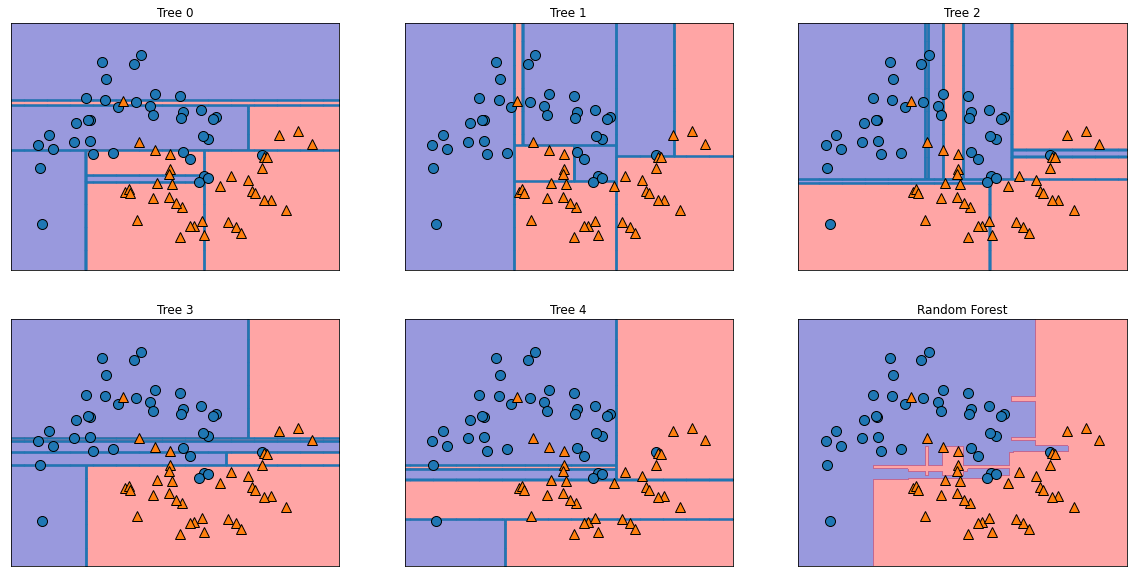

In [72]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
# zip()関数では多い分の要素が無視される
# enumerate()関数を使うと、forループの中でリストやタプルなどのイテラブルオブジェクトの要素と同時にインデックス番号（カウント、順番）を取得
# plt.subplots()するとaxesに二次元配列ができるため、for loopでグラフを描くときネストしなければならないが、ravel()で一次元配列にしてやれば、ネスト不要
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set 1.000
Accuracy on test set 0.972


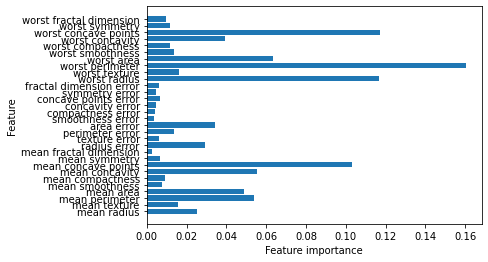

In [74]:
plot_feature_importances_cancer(forest)

ランダムフォレストでは、決定木より多くの特徴量に対して重要度を与えている。ランダムフォレストを構築する愛の乱数性によって、アルゴリズムは多くの可能な説明を考慮するようになるので、ランダムフォレストの結果は個々の決定木の結果よりも広い視野で見た全体像を捉えることができる。

**長所、短所、パラメータ**

回帰でもクラス分類でも、ランダムフォレストが現在最も広く使われている機械学習手法である。

no_jobsを使って使用するコアを指定できる。

ランダムフォレストは、テキストデータなどの、非常に高次元で疎なデータに対してはうまく機能しない傾向にある。このようなデータに対しては線形モデルの方が適している。

重要なパラメータは、n_samples、max_features、max_depthなどの事前枝刈りパラメータである。簡単なルールとしては「時間とメモリの有る限り大きくする」。

### 2.3.6.2 勾配ブースティング回帰木（勾配ブースティングマシン）

複数の決定木を組み合わせてより強力なモデルを構築するもう一つのアンサンブル手法。
このモデルは回帰にもクラス分類にも利用できる。

一つ前の決定木の誤りを次の決定木が修正するようにして、決定木を順番に作っていく。

深さ１〜５の非常に浅い決定木が用いられる。浅い決定木のようなモデル（弱学習機）を組み合わせる。
決定木を繰り返し追加していくことで性能を向上させる。

勾配ブースティング回帰木は機械学習のコンペでしばしば優勝しているし、産業界でも広く使われている。ランダムフォレストに比べるとパラメータ設定の影響を受けやすいが、パラメータさえ正しく設定されていれば、こちらの方が性能が良い。

事前枝刈りとアンサンブルに用いる決定木の数を決定するパラメータの他に、learning_rateという重要なパラメータがある。これは、個々の決定木がそれまでの決定木の過ちをどれくらい強く補正しようとするかを制御するパラメータ。

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set 1.000
Accuracy on test set 0.965


In [76]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set 0.991
Accuracy on test set 0.972


In [77]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set 0.988
Accuracy on test set 0.965


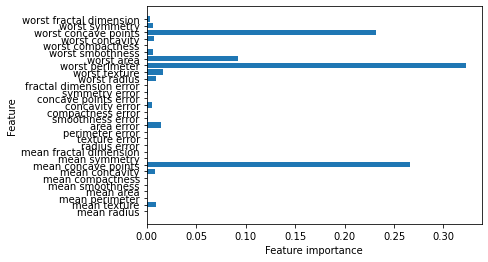

In [78]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

ランダムフォレストの特徴量重要度に似ているが、公害ブースティングの方では、いくつかの特徴量が完全に無視されている。

勾配ブースティングとランダムフォレストは、同じようなデータを得意とする。一般的にはランダムフォレストを先に試した方が良い。頑健なため。ランダムフォレストがうまくいったとしても、予測時間が非常に重要な場合や機械学習モデルから最後の1％まで性能を絞り出したい場合には勾配ブースティングを試す。

**長所、短所、パラメータ**

教師あり学習の中でも最も強力で、広く使われているモデル。
短所：パラメータチューニングに細心の注意が必要。訓練の時間が長い。疎なデータに対してうまく機能しない。
長所：他の決定木ベースのモデルと同様に特徴量のスケール変換をする必要はない。

n_estimatorsを大きくすると過剰学習を招く。n_estimatorsを時間とメモリ量で決めておいて、learning_rateに対して探索を行う方法がよく用いられる。
もう一つ重要なパラメータは、個々の決定木の複雑さを減らすmax_depth（もしくはmax_leaf_nodes）である。非常に小さく設定され、深さが５以上になることはあまりない。

## 2.3.7 カーネル法を用いたサポートベクタマシン

より複雑なモデルを可能にするために線形SVMを拡張したもの。カーネル法を用いたSVMの背景にある数学をかなり難しい。詳細は「統計的学習の基礎」共立出版を参照のこと。

### 2.3.7.1 線形モデルと非線形特徴量

線形モデルと柔軟にする方法の一つが、特徴量を追加すること。例えば、入力特徴量の交互作用（積）や多項式を加える。

Text(0, 0.5, 'Feature 1')

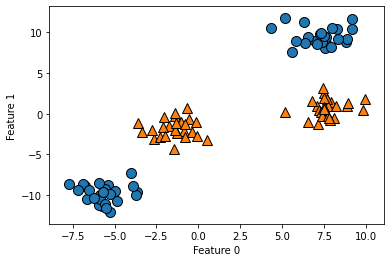

In [79]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Text(0, 0.5, 'Feature 1')

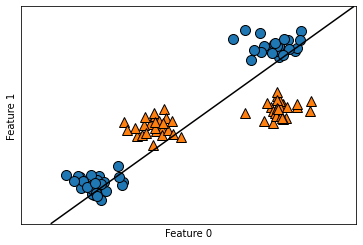

In [80]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5, 0, 'feature1 ** 2')

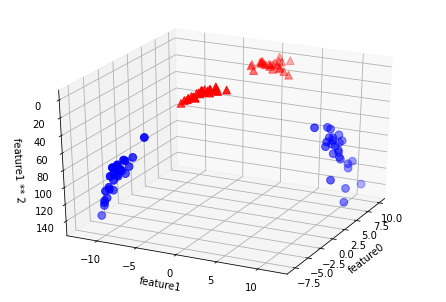

In [81]:
# 2番目の特徴量の二乗を追加
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3Dで可視化
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0の点をプロットしてからy == 1の点をプロット
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Text(0.5, 0, 'feature1 ** 2')

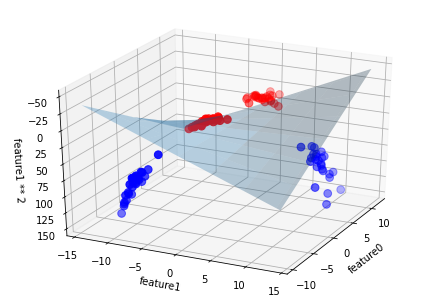

In [82]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 線形決定協会を描画
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min()-2, X_new[:, 0].max()+2, 50)
yy = np.linspace(X_new[:, 1].min()-2, X_new[:, 1].max()+2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX *+ coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', cmap=mglearn.cm2, s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0, 0.5, 'Feature 1')

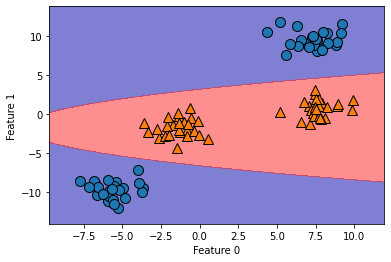

In [83]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 2.3.7.2 カーネルトリック

非線形の特徴量をデータ表現に加えると線形モデルが強力になる。しかし、実際にはどの特徴量を加えたら良いか分からない。実際に計算せずに、高次元空間でのクラス分類器を学習させる巧妙な数学的トリックをカーネルトリックと呼ばれ、拡張された特徴表現上でのデータポイント間の距離を、実際にデータポイントの拡張を計算せずに、直接計算する方法である。

SVMで広く用いられる高次元空間へのマップ方法が二つ
* 多項式カーネル
* 放射基底関数カーネル（ガウシアンカーネル）

カーネル法を用いたSVMの背景にある数学の詳細は、実用上重要ではないので、動作を見て確認する。

### 2.3.7.3 SVMを理解する

訓練の過程で、SVMは個々のデータポイントが、2つのクラスの決定境界を表現するのにどの程度重要かを学習する。多くの場合、2つのクラスの境界に位置するごく一部の訓練データポイントだけが決定境界を決定する。これらのデータポイントをサポートベクタと呼ぶ。

データポイント間の距離は次の（exp(-r||x1-x2||^2）ように定義される。

||x1-x2||:ユークリッド距離。
r(gamma):ガウシアンカーネルの幅を制御するパラメータ

Text(0, 0.5, 'Feature 1')

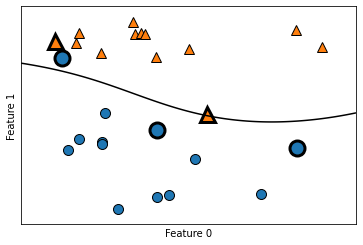

In [84]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# サポートベクタをプロットする
sv = svm.support_vectors_
# サポートベクタのクラスラベルはdual_coef_の正負によって与えられる
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 2.3.7.4 SVMパラメータの調整

gammaパラメータは、ガウシアンカーネルの幅を調整する。このパラメータが点が近いということを意味するスケールを決定する。Cパラメータは、線形モデルで用いられたのと同様の正則化パラメータ。

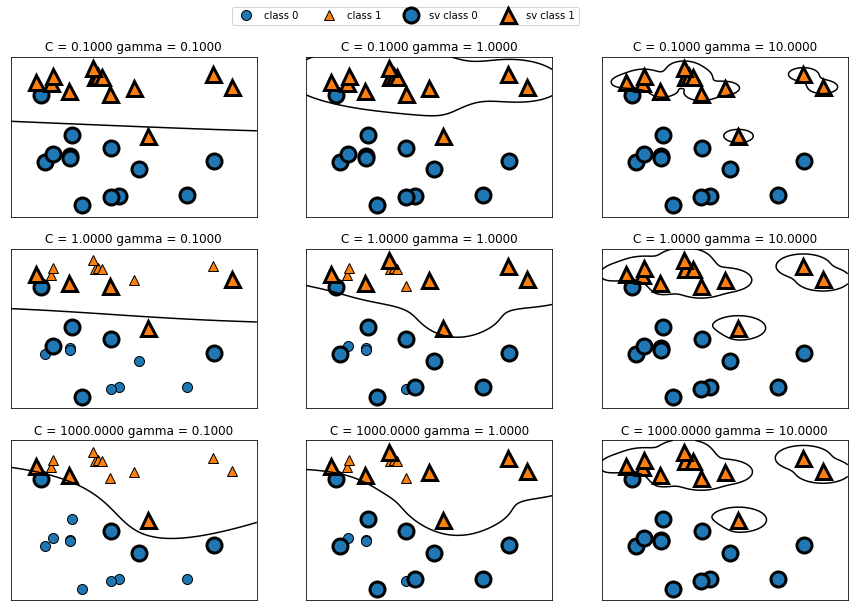

In [85]:
fig, axes = plt.subplots(3 ,3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
  for a, gamma in zip(ax, range(-1, 2)):
    mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2))

RBFカーネル法を用いたSVMをcancerデータセットに適用する

In [86]:
X_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc=SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set : {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set : {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set : 0.90
Accuracy on test set : 0.94


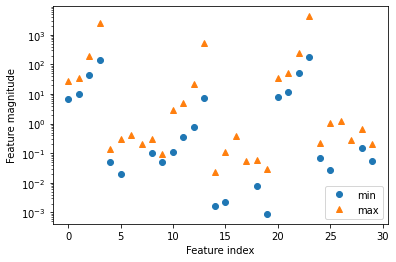

In [87]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [88]:
# 訓練セットの特徴量ごとに最小値を計算
min_on_training = X_train.min(axis=0)
# 訓練セットの特徴量ごとにレンジ（最大値ー最小値）を計算
range_on_training = (X_train - min_on_training).max(axis=0)

# 最小値を引いてレンジで割る
# 個々の特徴量はmin=0、max=1となる
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature \n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature \n{}".format(X_train_scaled.max(axis=0)))

Minimum for each feature 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [89]:
# テストセットに対しても、全く同じ変換を行う
# 訓練セットの最小値とレンジを用いる（詳細は４章を参照）
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


In [90]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


SVMを用いると、データにわずかな特徴量しかない場合にも複雑な決定境界を生成することができる。低次元でも高次元でもうまく機能するが、サンプルの個数が大きくなるとうまく機能しない。10,000サンプルぐらいまではうまく機能するが、100,000サンプルぐらいになると、実行時やメモリ使用量の面で難しくなる。

SVMの問題点は、注意深くデータの前処理とパラメータ調整を行う必要がある。

## 2.3.8 ニューラルネットワーク

### 2.3.8.1 ニューラルネットワークモデル

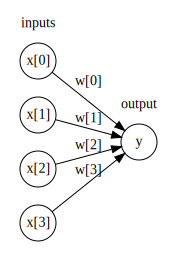

In [91]:
display(mglearn.plots.plot_logistic_regression_graph())

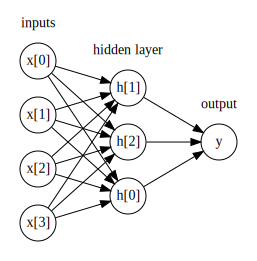

In [92]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

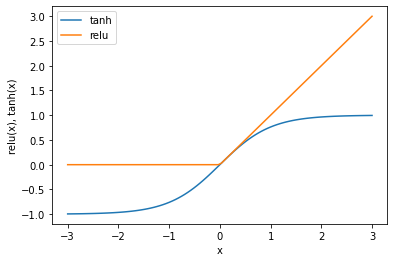

In [94]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

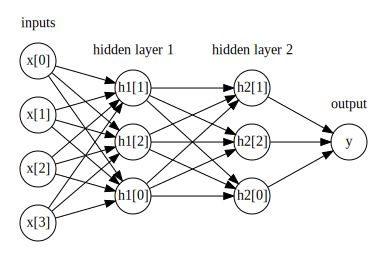

In [95]:
mglearn.plots.plot_two_hidden_layer_graph()

### 2.3.8.2 ニューラルネットワークのチューニング

In [ ]:
from sklearn.neural_network import MLPClassifier
